In [40]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('../../data/iris.csv', encoding='latin1')
data.columns =['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm','Species']
data.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


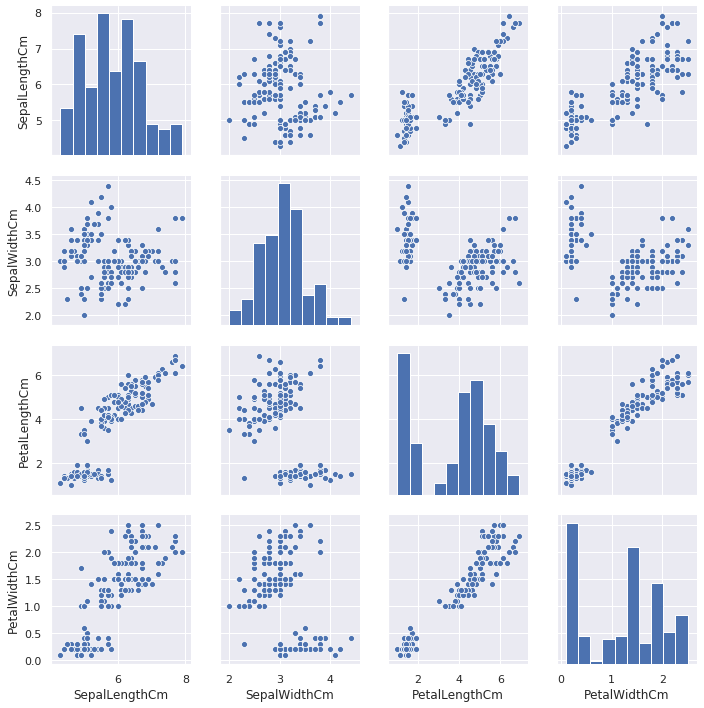

In [41]:
sns.pairplot(data)
plt.show()

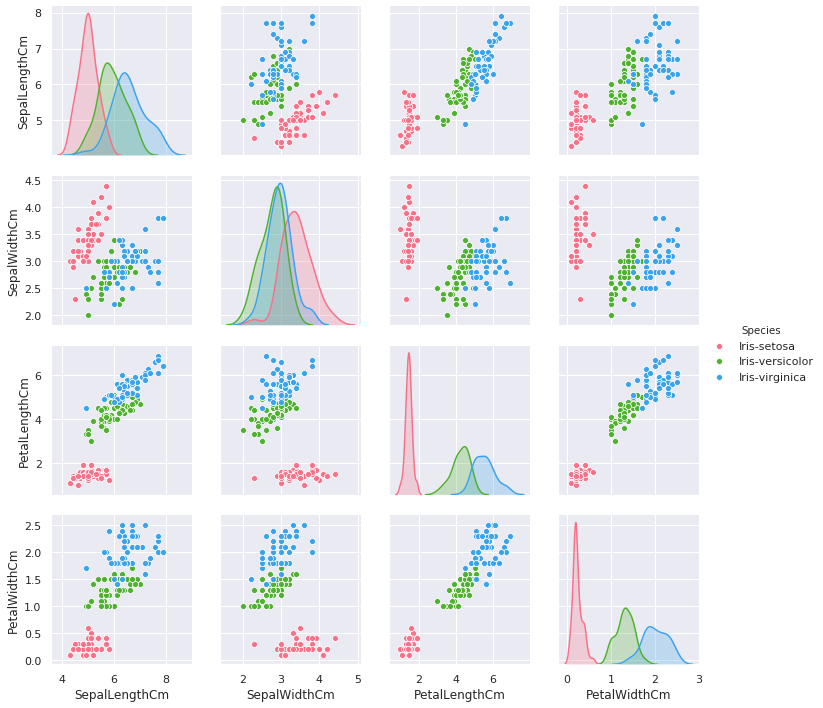

In [42]:
"""
pairplot
hue: 지정한 컬럼을 색상으로 구분
palette: 사용할 색상을 지정
"""
sns.pairplot(data, hue='Species', palette='husl')
plt.show()

### pairplot의 해석
위 도표에서 PetalWidthCm(X축)과 PetalLengthCm(Y축)을 보면,  PetalWidthCm이 증가할 수록 PetalLengthCm도 같이 증가하고 있다.
반면에 PetalWidthCm과 SepalWidthCm을 보면, 서로 상관관계가 없어 보인다.

즉, 도표에서 각 축간의 상관관계가 있음을 시각적으로 확인을 할 수 있다. 그것을 수치로 표현을 하면 아래와 같다.

### Pearson correlation coefficient(피어슨상관계수)
corrcoef는 np에서 제공하는 Pearson correlation coefficient를 구하는 함수이다.

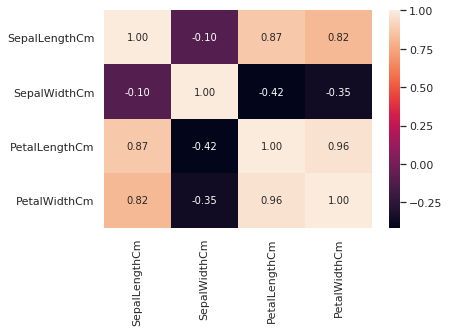

In [50]:
import numpy as np
"""
heatmap
"""
cols =['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']
df = np.corrcoef(data[cols].values.T)

sns.set(font_scale=1)
sns.heatmap(df,cbar=True, annot=True, fmt='.2f', annot_kws={'size':10},xticklabels=cols,yticklabels=cols)
plt.show()

# Transpose index and columns and Pearson correlation coefficient

df:
  col1  col2 col3
0    a     1    b
1    x     8    y


df values:
[['a' 1]
 ['x' 8]]


Transposed df values:
[['a' 'x']
 [1 8]]


   x     y  z
0  1   2.8  2
1  2   6.1  6
2  3   8.7  1
3  4  11.0  9
4  5  17.0  3 

[[1.         0.98252748 0.24168412]
 [0.98252748 1.         0.13377699]
 [0.24168412 0.13377699 1.        ]] 



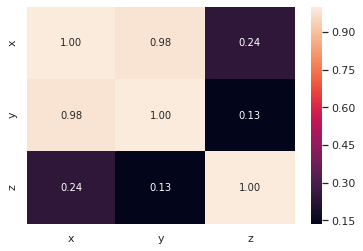

In [84]:
# Transposed index and columns
df = pd.DataFrame([['a',1,'b'],['x',8, 'y']], columns=['col1','col2','col3'])
print('df:', df, '\n',sep='\n')
print('df values:',df[['col1','col2']].values, '\n',sep='\n')
print('Transposed df values:',df[['col1','col2']].values.T, '\n',sep='\n')

# Pearson correlation coefficient
# y=3x로 구성을 하여 상관관계가 높음을 확인을 하고
# z는 무작위 숫자로 구성을 하여 x와 상관관계가 낮음을 확인을 할 것임.
x = np.array([1,2,3,4,5])
y = np.array([2.8,6.1,8.7,11,17])
z = np.array([2,6,1,9,3])

xyz = pd.DataFrame({'x':x, 'y':y, 'z':z})
print(xyz, '\n')

# Pearson correlation coefficient
p_xyz = np.corrcoef(xyz.values.T)
print(p_xyz, '\n')

# heatmap
sns.set(font_scale=1)
sns.heatmap(p_xyz
            ,cbar=True, annot=True, fmt='.2f'
            , annot_kws={'size':10}
            ,xticklabels=['x','y','z'],yticklabels=['x','y','z'])
plt.show()


- x와 y는 거의 y=3x의 관계이고, 
- x와 z는 거의 관계가 없다.

그래서, 위의 그래프를 보면 x와 y는1에 근접하여 상관관계가 높고, x와 z는 0에 근접하여 상관관계가 낮다.

상관관계 계수는 -1 부터 1까지로 리턴되며 ,-1이나 1에 가까울 수롤 상관관계가 높은 것이다.

그라나, 상관관계가 높다는 것은 인과관계와 상관이 없다는 것이다.